In [1]:
import pandas as pd 
import numpy as np 
import configparser
import os
import seaborn as sns
import plotly_express as px

import nltk 

config = configparser.ConfigParser()
config.read("env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
base_path = config['DEFAULT']['base_path']
code_dir = config['DEFAULT']['code_dir']

data_prefix = 'Maha'
out_path = f'{output_dir}/{data_prefix}'
OHCO = ['book_id','chap_num', 'para_num', 'sent_num', 'token_num']


os.chdir(code_dir)
import preprocess
import bow_analysis
os.chdir(base_path)

In [2]:
CORPUS = pd.read_csv(f"{output_dir}\{data_prefix}-CORPUS.csv", sep="|").set_index(OHCO)
LIB = pd.read_csv(f"{output_dir}\{data_prefix}-LIB.csv", sep="|")
VOCAB = pd.read_csv(f"{output_dir}\{data_prefix}-VOCAB.csv", sep="|")

<string>:1: SyntaxWarning: invalid escape sequence '\{'
<string>:2: SyntaxWarning: invalid escape sequence '\{'
<string>:3: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<string>:1: SyntaxWarning: invalid escape sequence '\{'
<string>:2: SyntaxWarning: invalid escape sequence '\{'
<string>:3: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
C:\Users\vishg\AppData\Local\Temp\ipykernel_212\689437876.py:1: SyntaxWarning: invalid escape sequence '\{'
  CORPUS = pd.read_csv(f"{output_dir}\{data_prefix}-CORPUS.csv", sep="|").set_index(OHCO)
C:\Users\vishg\AppData\Local\Temp\ipykernel_212\689437876.py:2: SyntaxWarning: invalid escape sequence '\{'
  LIB = pd.read_csv(f"{output_dir}\{data_prefix}-LIB.csv",

In [3]:
book_bow = bow_analysis.bow_rep(CORPUS, "BOOKS")
TFIDF_dict = bow_analysis.compute_TFIDF(book_bow, "log", "standard")

book_bow['tf'] = TFIDF_dict['TF'].stack()
book_bow['tfidf'] = TFIDF_dict['TFIDF'].stack()
agg_tfidf = book_bow.reset_index().groupby("term_str")\
            .agg({"tfidf":"mean","n":"mean"})

# Merging the Vocab Table to get the Frequently Used POS
agg_tfidf = agg_tfidf.reset_index().merge(VOCAB.reset_index()[['term_str','max_pos','cat_pos']], on="term_str", how='left')

print("Top 20 words in the corpus by TFIDF mean using the `max` count method and `book` as the bag:")
agg_tfidf.sort_values('tfidf', ascending=False).head(20).reset_index(drop=True)

Top 20 words in the corpus by TFIDF mean using the `max` count method and `book` as the bag:


term_str      tfidf     n max_pos              cat_pos
0      sambhava  26.510515  81.0     NNP              {'NNP'}
1        jajali  23.412919  48.0     NNP              {'NNP'}
2    vrihadaswa  23.162219  46.0     NNP              {'NNP'}
3    vrihannala  23.162219  46.0     NNP              {'NNP'}
4     purochana  21.883464  37.0     NNP              {'NNP'}
5     rituparna  21.723030  36.0     NNP              {'NNP'}
6           adi  21.558200  35.0     NNP              {'NNP'}
7        iravat  21.558200  35.0     NNP        {'NNP', 'JJ'}
8        vandin  21.558200  35.0     NNP              {'NNP'}
9      jivasoul  21.388725  34.0     NNP        {'NNP', 'JJ'}
10      yavakri  21.214338  33.0     NNP  {'NNP', 'RB', 'NN'}
11      swaitya  20.461366  29.0     NNP              {'NNP'}
12   dasarnakas  19.827524  26.0     NNP              {'NNP'}
13      pauloma  19.600481  25.0     NNP              {'NNP'}
14      vahikas  19.364532  24.0     NNP      {'NNP', 'NNPS'}
15       tapati  19.118950  23.0     NNP              {'NNP'}
16    yatudhani  18.862914  22.0     NNP        {'NNP', 'NN'}
17  kumbhakarna  18.595495  21.0     NNP              {'NNP'}
18    varshneya  18.595495  21.0     NNP              {'NNP'}
19  panchasikha  18.595495  21.0     NNP              {'NNP'}

In [4]:
", ".join(list(agg_tfidf.sort_values('tfidf', ascending=False)['term_str'].head(20)))

'sambhava, jajali, vrihadaswa, vrihannala, purochana, rituparna, adi, iravat, vandin, jivasoul, yavakri, swaitya, dasarnakas, pauloma, vahikas, tapati, yatudhani, kumbhakarna, varshneya, panchasikha'

In [5]:
book_bow.to_csv(f"{output_dir}\{data_prefix}-BOW-BOOKS.csv",sep = "|")
book_bow

<string>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<string>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
C:\Users\vishg\AppData\Local\Temp\ipykernel_212\3026988511.py:1: SyntaxWarning: invalid escape sequence '\{'
  book_bow.to_csv(f"{output_dir}\{data_prefix}-BOW-BOOKS.csv",sep = "|")
<string>:1: SyntaxWarning: invalid escape sequence '\{'


n        tf     tfidf
book_id term_str                            
1       1              1  1.000000  0.710493
        10th           1  1.000000  4.169925
        11th           1  1.000000  4.169925
        12th           1  1.000000  4.169925
        1st            1  1.000000  4.169925
...                   ..       ...       ...
18      your           5  2.584963  0.000000
        yours          1  1.000000  0.169925
        yourself       1  1.000000  1.584963
        yudhamanyu     1  1.000000  1.169925
        yudhishthira  30  4.954196  0.000000

[119429 rows x 3 columns]

In [6]:
DTCM = book_bow.n.unstack(fill_value=0)
DTCM.to_csv(f"{output_dir}\{data_prefix}-DTCM-BOOKS.csv",sep = "|")
DTCM

<string>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<string>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
C:\Users\vishg\AppData\Local\Temp\ipykernel_212\573807581.py:2: SyntaxWarning: invalid escape sequence '\{'
  DTCM.to_csv(f"{output_dir}\{data_prefix}-DTCM-BOOKS.csv",sep = "|")
<string>:2: SyntaxWarning: invalid escape sequence '\{'


term_str  01  1  10  100  1000  10000  100000  1001  1002  1003  ...  \
book_id                                                          ...   
1          0  1   0    0     0      0       0     0     0     0  ...   
2          0  1   0    0     0      0       0     0     0     0  ...   
3          0  1   1    1     0      0       0     0     0     0  ...   
4          0  1   1    0     0      0       0     0     0     0  ...   
5          0  1   1    0     0      0       0     0     0     0  ...   
6          0  1   1    1     0      0       0     0     0     0  ...   
7          0  1   1    1     0      0       0     0     0     0  ...   
8          0  0   0    3    23     16       1     0     0     0  ...   
9          0  0   0    0     7      4       1     0     0     0  ...   
10         0  0   0    0     5      1       0     0     0     0  ...   
11         0  0   0    0     1      1       0     0     0     0  ...   
12         1  5   1    1     1      0       0     1     1     1  ...   
13         0  1   1    1     0      0       0     0     0     0  ...   
14         0  1   1    1     0      0       0     0     0     0  ...   
15         0  1   1    0     0      0       0     0     0     0  ...   
16         0  0   0    0     1      0       0     0     0     0  ...   
17         0  0   0    0     2      0       0     0     0     0  ...   
18         0  0   0    0     1      0       0     0     0     0  ...   

term_str  yuyudhana  yuyudhanas  yuyutshu  yuyutsu  yuyutsus  zeal  zealously  \
book_id                                                                         
1                 1           0         0       11         0     0          0   
2                 1           0         0        0         0     0          0   
3                 2           0         1        0         0     0          0   
4                 1           0         0        0         0     0          1   
5                13           0         0        5         0     0          1   
6                 5           1         0        2         0     0          0   
7               105          10         0        8         1     1          0   
8                 7           0         0       10         1     0          1   
9                 3           0         0        7         0     0          0   
10                1           0         0        0         0     0          0   
11                3           0         0        2         0     0          0   
12                0           0         0        6         0     1          1   
13                1           0         0        3         0     0          0   
14                4           0         0        4         0     0          0   
15                1           0         0        7         0     0          0   
16                6           0         0        0         0     0          0   
17                0           0         0        2         0     0          0   
18                0           0         0        0         0     0          0   

term_str  zenana  zodiac  zone  
book_id                         
1              0       1     0  
2              1       0     0  
3              0       0     0  
4              0       0     1  
5              0       1     0  
6              0       0     0  
7              0       0     0  
8              0       0     0  
9              0       0     0  
10             0       0     0  
11             0       0     0  
12             0       0     0  
13             0       0     0  
14             0       0     0  
15             0       0     0  
16             0       0     0  
17             0       0     0  
18             0       0     0  

[18 rows x 30654 columns]

In [7]:
TFIDF_dict['TFIDF'].to_csv(f"{output_dir}\{data_prefix}-TFIDF-BOOKS.csv",sep = "|")
TFIDF_dict['TFIDF']

<string>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<string>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
C:\Users\vishg\AppData\Local\Temp\ipykernel_212\1201469117.py:1: SyntaxWarning: invalid escape sequence '\{'
  TFIDF_dict['TFIDF'].to_csv(f"{output_dir}\{data_prefix}-TFIDF-BOOKS.csv",sep = "|")
<string>:1: SyntaxWarning: invalid escape sequence '\{'


term_str        01         1   10      100      1000     10000    100000  \
book_id                                                                    
1         0.000000  0.710493  0.0  0.00000  0.000000  0.000000  0.000000   
2         0.000000  0.710493  0.0  0.00000  0.000000  0.000000  0.000000   
3         0.000000  0.710493  1.0  1.36257  0.000000  0.000000  0.000000   
4         0.000000  0.710493  1.0  0.00000  0.000000  0.000000  0.000000   
5         0.000000  0.710493  1.0  0.00000  0.000000  0.000000  0.000000   
6         0.000000  0.710493  1.0  1.36257  0.000000  0.000000  0.000000   
7         0.000000  0.710493  1.0  1.36257  0.000000  0.000000  0.000000   
8         0.000000  0.000000  0.0  2.72514  5.364062  8.869488  3.169925   
9         0.000000  0.000000  0.0  0.00000  3.509775  5.038410  3.169925   
10        0.000000  0.000000  0.0  0.00000  3.024212  2.169925  0.000000   
11        0.000000  0.000000  0.0  0.00000  1.169925  2.169925  0.000000   
12        4.169925  1.836599  1.0  1.36257  1.169925  0.000000  0.000000   
13        0.000000  0.710493  1.0  1.36257  0.000000  0.000000  0.000000   
14        0.000000  0.710493  1.0  1.36257  0.000000  0.000000  0.000000   
15        0.000000  0.710493  1.0  0.00000  0.000000  0.000000  0.000000   
16        0.000000  0.000000  0.0  0.00000  1.169925  0.000000  0.000000   
17        0.000000  0.000000  0.0  0.00000  1.854287  0.000000  0.000000   
18        0.000000  0.000000  0.0  0.00000  1.169925  0.000000  0.000000   

term_str      1001      1002      1003  ...  yuyudhana  yuyudhanas  yuyutshu  \
book_id                                 ...                                    
1         0.000000  0.000000  0.000000  ...   0.263034    0.000000  0.000000   
2         0.000000  0.000000  0.000000  ...   0.263034    0.000000  0.000000   
3         0.000000  0.000000  0.000000  ...   0.416900    0.000000  4.169925   
4         0.000000  0.000000  0.000000  ...   0.263034    0.000000  0.000000   
5         0.000000  0.000000  0.000000  ...   1.001465    0.000000  0.000000   
6         0.000000  0.000000  0.000000  ...   0.679934    3.169925  0.000000   
7         0.000000  0.000000  0.000000  ...   1.769675   10.966139  0.000000   
8         0.000000  0.000000  0.000000  ...   0.789103    0.000000  0.000000   
9         0.000000  0.000000  0.000000  ...   0.526069    0.000000  0.000000   
10        0.000000  0.000000  0.000000  ...   0.263034    0.000000  0.000000   
11        0.000000  0.000000  0.000000  ...   0.526069    0.000000  0.000000   
12        4.169925  4.169925  4.169925  ...   0.000000    0.000000  0.000000   
13        0.000000  0.000000  0.000000  ...   0.263034    0.000000  0.000000   
14        0.000000  0.000000  0.000000  ...   0.610747    0.000000  0.000000   
15        0.000000  0.000000  0.000000  ...   0.263034    0.000000  0.000000   
16        0.000000  0.000000  0.000000  ...   0.738431    0.000000  0.000000   
17        0.000000  0.000000  0.000000  ...   0.000000    0.000000  0.000000   
18        0.000000  0.000000  0.000000  ...   0.000000    0.000000  0.000000   

term_str   yuyutsu  yuyutsus      zeal  zealously    zenana    zodiac  \
book_id                                                                 
1         2.097069  0.000000  0.000000   0.000000  0.000000  3.169925   
2         0.000000  0.000000  0.000000   0.000000  4.169925  0.000000   
3         0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
4         0.000000  0.000000  0.000000   2.169925  0.000000  0.000000   
5         1.512106  0.000000  0.000000   2.169925  0.000000  3.169925   
6         0.927144  0.000000  0.000000   0.000000  0.000000  0.000000   
7         1.854287  3.169925  3.169925   0.000000  0.000000  0.000000   
8         2.023638  3.169925  0.000000   2.169925  0.000000  0.000000   
9         1.754888  0.000000  0.000000   0.000000  0.000000  0.000000   
10        0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
11

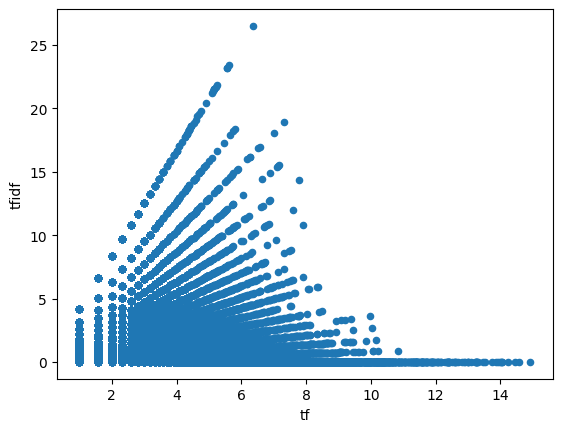

In [8]:
book_bow.plot.scatter('tf', 'tfidf');

In [9]:
def top_books_for_term(term_str):
    X = book_bow.reset_index().merge(LIB, on="book_id")
    
    X = X.query(f"term_str == '{term_str}'").groupby(['book_id','raw_title'])\
        .agg({'tfidf':'mean', 'n':'sum', 'tf':'sum'}).sort_values("book_id")
    return px.scatter(X.reset_index(), 'n','tfidf', 
                      color="book_id",
                      size='tf',
                      hover_name='raw_title', 
                      height=500, 
                      width=600, 
                      title=f"{term_str}")

In [10]:
top_books_for_term('kesava')

In [11]:
BOOL = DTCM.astype('bool')
DF = BOOL.sum()
BOOL_TFIDF = TFIDF_dict['TF'] * TFIDF_dict['IDF']
DOC = pd.DataFrame(index=DTCM.index)
DOC['book_chap_sig_bool'] = BOOL_TFIDF.T.mean()
DOC['book_chap_sig'] = TFIDF_dict['TFIDF'].T.mean()
DOC['n_tokens'] = DTCM.sum(1)
DOC

book_chap_sig_bool  book_chap_sig  n_tokens
book_id                                             
1                  0.967933       0.967933    228680
2                  0.397407       0.397407     74951
3                  1.291440       1.291440    323180
4                  0.283011       0.283011     61157
5                  0.715385       0.715385    188718
6                  0.510757       0.510757    148378
7                  0.616497       0.616497    245954
8                  0.389495       0.389495    138242
9                  0.317072       0.317072     91541
10                 0.084026       0.084026     21340
11                 0.087351       0.087351     21834
12                 1.603282       1.603282    456649
13                 0.969537       0.969537    277582
14                 0.353279       0.353279     81004
15                 0.109242       0.109242     30374
16                 0.039466       0.039466      8070
17                 0.008969       0.008969      3060
18                 0.040327       0.040327      8626

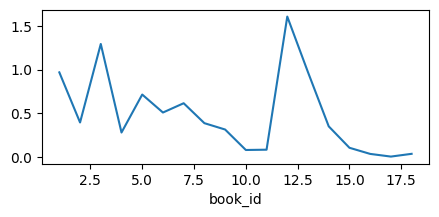

In [12]:
DOC.book_chap_sig.plot.line(figsize=(5,2));

In [13]:
DOC

book_chap_sig_bool  book_chap_sig  n_tokens
book_id                                             
1                  0.967933       0.967933    228680
2                  0.397407       0.397407     74951
3                  1.291440       1.291440    323180
4                  0.283011       0.283011     61157
5                  0.715385       0.715385    188718
6                  0.510757       0.510757    148378
7                  0.616497       0.616497    245954
8                  0.389495       0.389495    138242
9                  0.317072       0.317072     91541
10                 0.084026       0.084026     21340
11                 0.087351       0.087351     21834
12                 1.603282       1.603282    456649
13                 0.969537       0.969537    277582
14                 0.353279       0.353279     81004
15                 0.109242       0.109242     30374
16                 0.039466       0.039466      8070
17                 0.008969       0.008969      3060
18                 0.040327       0.040327      8626

In [14]:
DF

term_str
01            1
1            11
10            9
100           7
1000          8
             ..
zeal          2
zealously     4
zenana        1
zodiac        2
zone          1
Length: 30654, dtype: int64

In [15]:
VOCAB["df"] = VOCAB["term_str"].map(DF)
VOCAB["idf"] = VOCAB["term_str"].map(TFIDF_dict['IDF'])
VOCAB['dp'] = VOCAB.df / len(DTCM)
VOCAB['di'] = np.log2(1/VOCAB.dp)
VOCAB['dh'] = VOCAB.dp * VOCAB.di

VOCAB['tfidf_mean'] = VOCAB['term_str'].map(TFIDF_dict['TFIDF'].mean())
VOCAB['tfidf_sum'] = VOCAB['term_str'].map(TFIDF_dict['TFIDF'].sum())


In [16]:
VOCAB["df"] = VOCAB["term_str"].map(DF)
VOCAB

term_str   n  n_chars             p          i             s  \
0             01   1        2  4.150513e-07  21.200207  2.409341e+06   
1              1  15        1  6.225769e-06  17.293317  1.606227e+05   
2             10   9        2  3.735461e-06  18.030282  2.677046e+05   
3            100   9        3  3.735461e-06  18.030282  2.677046e+05   
4           1000  41        4  1.701710e-05  15.842655  5.876441e+04   
...          ...  ..      ...           ...        ...           ...   
30650       zeal   2        4  8.301025e-07  20.200207  1.204670e+06   
30651  zealously   4        9  1.660205e-06  19.200207  6.023352e+05   
30652     zenana   1        6  4.150513e-07  21.200207  2.409341e+06   
30653     zodiac   2        6  8.301025e-07  20.200207  1.204670e+06   
30654       zone   1        4  4.150513e-07  21.200207  2.409341e+06   

              h  stop stem_porter stem_snowball  ... cat_pos_group n_pos  \
0      0.000009     0          01            01  ...        {'CD'}     1   
1      0.000108     0           1             1  ...        {'CD'}     1   
2      0.000067     0          10            10  ...        {'CD'}     1   
3      0.000067     0         100           100  ...        {'CD'}     1   
4      0.000270     0        1000          1000  ...        {'CD'}     1   
...         ...   ...         ...           ...  ...           ...   ...   
30650  0.000017     0        zeal          zeal  ...        {'NN'}     1   
30651  0.000032     0     zealous       zealous  ...        {'RB'}     1   
30652  0.000009     0      zenana        zenana  ...        {'NN'}     1   
30653  0.000017     0      zodiac        zodiac  ...        {'NN'}     1   
30654  0.000009     0        zone          zone  ...        {'NN'}     1   

       cat_pos    df       idf        dp        di        dh  tfidf_mean  \
0       {'CD'}   1.0  4.169925  0.055556  4.169925  0.231663    0.231663   
1       {'CD'}  11.0  0.710493  0.611111  0.710493  0.434190    0.496752   
2       {'CD'}   9.0  1.000000  0.500000  1.000000  0.500000    0.500000   
3       {'CD'}   7.0  1.362570  0.388889  1.362570  0.529888    0.605587   
4       {'CD'}   8.0  1.169925  0.444444  1.169925  0.519967    1.024002   
...        ...   ...       ...       ...       ...       ...         ...   
30650   {'NN'}   2.0  3.169925  0.111111  3.169925  0.352214    0.352214   
30651   {'RB'}   4.0  2.169925  0.222222  2.169925  0.482206    0.482206   
30652   {'NN'}   1.0  4.169925  0.055556  4.169925  0.231663    0.231663   
30653  {'NNP'}   2.0  3.169925  0.111111  3.169925  0.352214    0.352214   
30654   {'NN'}   1.0  4.169925  0.055556  4.169925  0.231663    0.231663   

       tfidf_sum  
0       4.169925  
1       8.941533  
2       9.000000  
3      10.900561  
4      18.432037  
...          ...  
30650   6.339850  
30651   8.679700  
30652   4.169925  
30653   6.339850  
30654   4.169925  

[30655 rows x 24 columns]

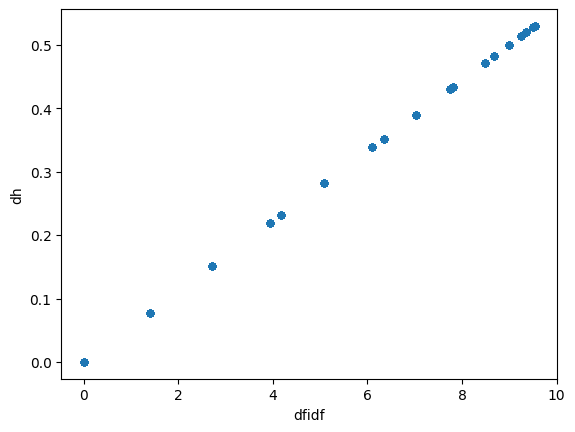

In [17]:
VOCAB['dfidf'] = VOCAB.df * VOCAB.idf
VOCAB.plot.scatter('dfidf', 'dh');

In [18]:
VOCAB

term_str   n  n_chars             p          i             s  \
0             01   1        2  4.150513e-07  21.200207  2.409341e+06   
1              1  15        1  6.225769e-06  17.293317  1.606227e+05   
2             10   9        2  3.735461e-06  18.030282  2.677046e+05   
3            100   9        3  3.735461e-06  18.030282  2.677046e+05   
4           1000  41        4  1.701710e-05  15.842655  5.876441e+04   
...          ...  ..      ...           ...        ...           ...   
30650       zeal   2        4  8.301025e-07  20.200207  1.204670e+06   
30651  zealously   4        9  1.660205e-06  19.200207  6.023352e+05   
30652     zenana   1        6  4.150513e-07  21.200207  2.409341e+06   
30653     zodiac   2        6  8.301025e-07  20.200207  1.204670e+06   
30654       zone   1        4  4.150513e-07  21.200207  2.409341e+06   

              h  stop stem_porter stem_snowball  ... n_pos  cat_pos    df  \
0      0.000009     0          01            01  ...     1   {'CD'}   1.0   
1      0.000108     0           1             1  ...     1   {'CD'}  11.0   
2      0.000067     0          10            10  ...     1   {'CD'}   9.0   
3      0.000067     0         100           100  ...     1   {'CD'}   7.0   
4      0.000270     0        1000          1000  ...     1   {'CD'}   8.0   
...         ...   ...         ...           ...  ...   ...      ...   ...   
30650  0.000017     0        zeal          zeal  ...     1   {'NN'}   2.0   
30651  0.000032     0     zealous       zealous  ...     1   {'RB'}   4.0   
30652  0.000009     0      zenana        zenana  ...     1   {'NN'}   1.0   
30653  0.000017     0      zodiac        zodiac  ...     1  {'NNP'}   2.0   
30654  0.000009     0        zone          zone  ...     1   {'NN'}   1.0   

            idf        dp        di        dh  tfidf_mean  tfidf_sum     dfidf  
0      4.169925  0.055556  4.169925  0.231663    0.231663   4.169925  4.169925  
1      0.710493  0.611111  0.710493  0.434190    0.496752   8.941533  7.815427  
2      1.000000  0.500000  1.000000  0.500000    0.500000   9.000000  9.000000  
3      1.362570  0.388889  1.362570  0.529888    0.605587  10.900561  9.537991  
4      1.169925  0.444444  1.169925  0.519967    1.024002  18.432037  9.359400  
...         ...       ...       ...       ...         ...        ...       ...  
30650  3.169925  0.111111  3.169925  0.352214    0.352214   6.339850  6.339850  
30651  2.169925  0.222222  2.169925  0.482206    0.482206   8.679700  8.679700  
30652  4.169925  0.055556  4.169925  0.231663    0.231663   4.169925  4.169925  
30653  3.169925  0.111111  3.169925  0.352214    0.352214   6.339850  6.339850  
30654  4.169925  0.055556  4.169925  0.231663    0.231663   4.169925  4.169925  

[30655 rows x 25 columns]

In [19]:
VOCAB.sample(25).sort_values('dh', ascending=False)[['term_str','max_pos', 'tfidf_mean', 'dh']].head(15)\
    .style.background_gradient(cmap='YlGnBu')

In [20]:
px.scatter(VOCAB.reset_index(), x='i', y='tfidf_mean', 
           hover_name='term_str', hover_data=['n'], color='max_pos', 
           log_x=False, log_y=False, height=500, width=700)

In [21]:
px.scatter(VOCAB.reset_index(), x='i', y='dh', 
           hover_name='term_str', hover_data=['n'], 
           color='max_pos', height=500, width=800)

In [22]:
BOOK = CORPUS.loc[6].copy()

TTM = pd.get_dummies(['term_str'], columns=['term_str'], prefix='', prefix_sep='', drop_first=True)\
    .reset_index(drop=True).iloc[:,1:]
TTM.index.name = 'time_id'

In [23]:
CORPUS

pos_tuple  pos  \
book_id chap_num para_num sent_num token_num                            
1       1        0        0        0                ('Om', 'NN')   NN   
                          1        0           ('Having', 'VBG')  VBG   
                                   1            ('bowed', 'VBN')  VBN   
                                   2              ('down', 'IN')   IN   
                                   3                ('to', 'TO')   TO   
...                                                          ...  ...   
18      6        37       2        25               ('of', 'IN')   IN   
                                   26          ('Vishnu', 'NNP')  NNP   
                                   27             ('like', 'IN')   IN   
                                   28          ('Vishnu', 'NNP')  NNP   
                                   29         ('himself', 'PRP')  PRP   

                                             token_str term_str pos_group  
book_id chap_num para_num sent_num token_num                               
1       1        0        0        0                Om       om        NN  
                          1        0            Having   having        VB  
                                   1             bowed    bowed        VB  
                                   2              down     down        IN  
                                   3                to       to        TO  
...                                                ...      ...       ...  
18      6        37       2        25               of       of        IN  
                                   26           Vishnu   vishnu        NN  
                                   27             like     like        IN  
                                   28           Vishnu   vishnu        NN  
                                   29          himself  himself        PR  

[2409341 rows x 5 columns]

In [25]:
BOOK = CORPUS.loc[6]
BOOK

pos_tuple  pos token_str  \
chap_num para_num sent_num token_num                                       
1        0        0        0                 ('OM', 'NN')   NN        OM   
                  1        0             ('HAVING', 'NN')   NN    HAVING   
                           1             ('BOWED', 'NNP')  NNP     BOWED   
                           2               ('down', 'RB')   RB      down   
                           3                 ('to', 'TO')   TO        to   
...                                                   ...  ...       ...   
124      3        0        36               ('the', 'DT')   DT       the   
                           37         ('quarters', 'NNS')  NNS  quarters   
                           38                ('of', 'IN')   IN        of   
                           40               ('thy', 'NN')   NN       thy   
                           41               ('son', 'NN')   NN       son   

                                      term_str pos_group  
chap_num para_num sent_num token_num                      
1        0        0        0                om        NN  
                  1        0            having        NN  
                           1             bowed        NN  
                           2              down        RB  
                           3                to        TO  
...                                        ...       ...  
124      3        0        36              the        DT  
                           37         quarters        NN  
                           38               of        IN  
                           40              thy        NN  
                           41              son        NN  

[148378 rows x 5 columns]

In [28]:
TTM = pd.get_dummies(BOOK['term_str'], columns=['term_str'], prefix='', prefix_sep='', drop_first=True)\
    .reset_index(drop=True).iloc[:,1:]
TTM.index.name = 'time_id'
TTM = TTM.astype('int')
cfg = {'figsize': (20,1)}

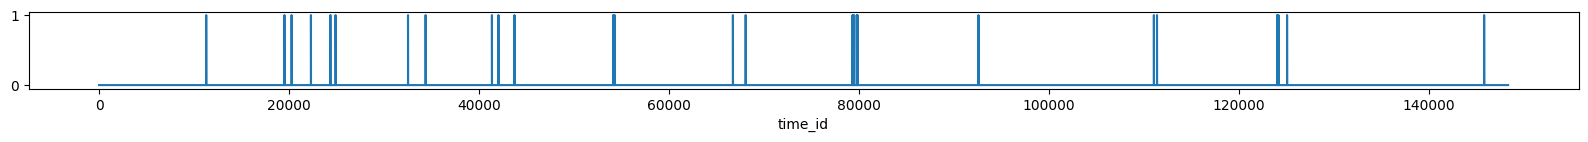

In [36]:
TTM['kesava'].plot(**cfg);

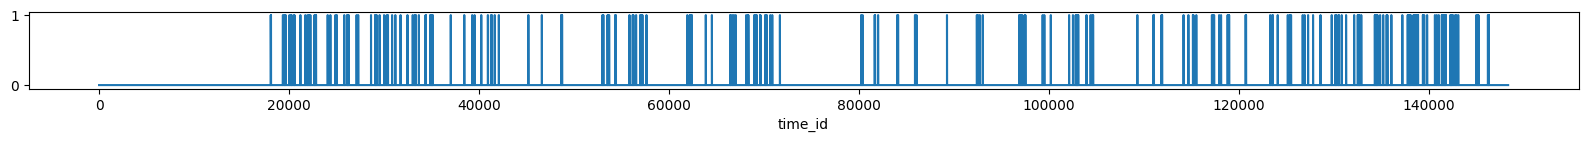

In [31]:
TTM['arjuna'].plot(**cfg);

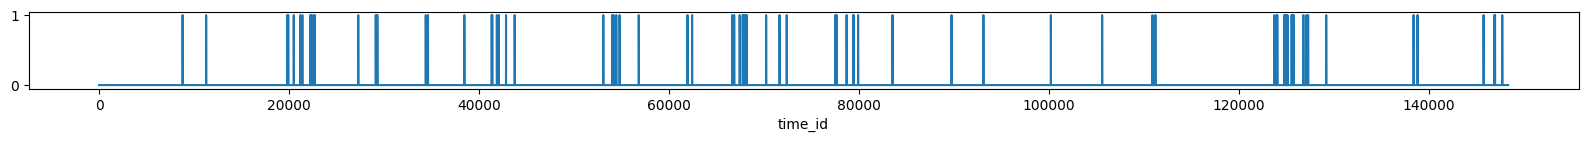

In [37]:
TTM['krishna'].plot(**cfg);

In [39]:
import matplotlib.pyplot as plt
B = BOOK['term_str'].reset_index(drop=True).to_frame().reset_index().rename(columns={'index':'offset'})
def plot_words(words, book):    
    
    X = book[book.term_str.isin(words)]
    
    plt.figure(figsize=(22, len(words)))
    
    ax = sns.stripplot(y='term_str', x='offset', data=X, orient='h', marker=".", color='navy', size=15, jitter=0)
    ax.set_title('Dispersion Plots', size=30, pad=20)
    ax.set_xlabel('Narrative Time', size=20)
    ax.set_ylabel('Term', size=20)
    
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(rotation=0, fontsize=20)
    plt.tight_layout()
    plt.show()

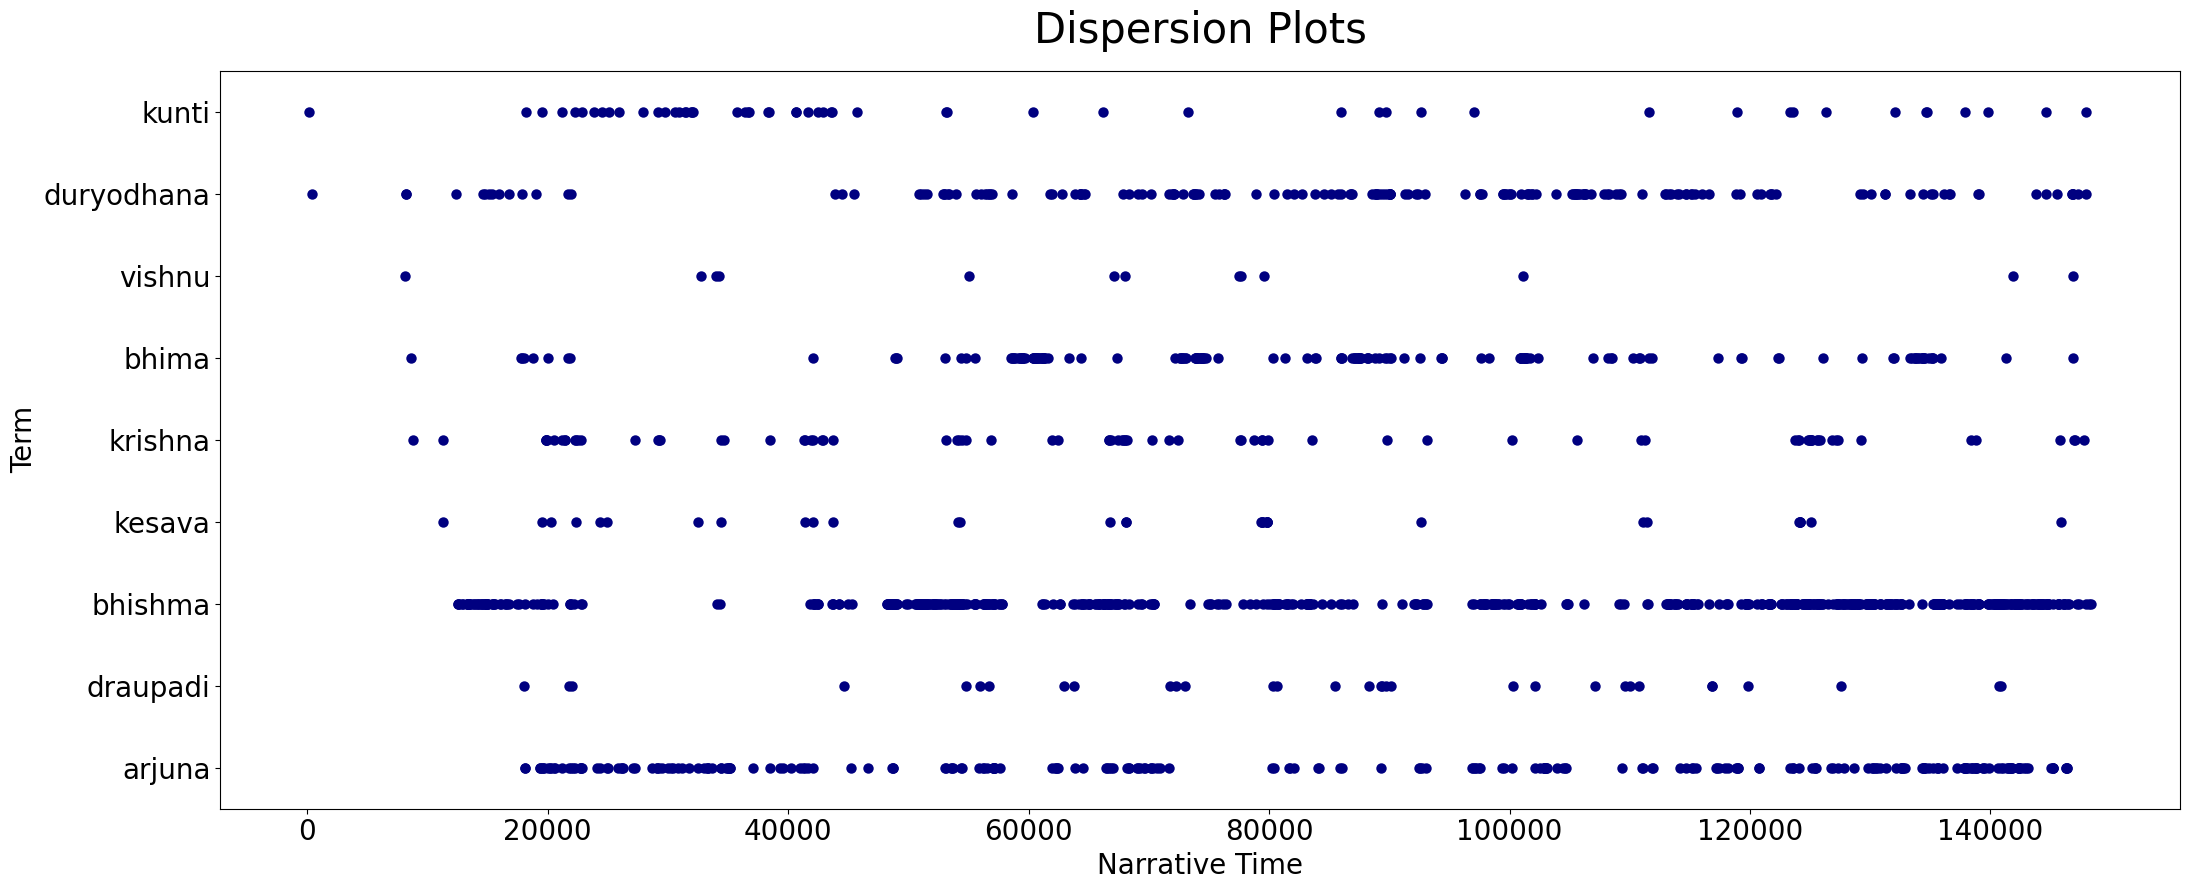

In [52]:
names = 'krishna kesava vishnu arjuna duryodhana bhishma bhima kunti draupadi'.split()
plot_words(names, B)